<a href="https://colab.research.google.com/github/sachin-0502/CODSOFT/blob/main/CODSOFT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_csv("/content/IRIS.csv")


In [25]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
df.shape

(150, 5)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [28]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [29]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:

df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

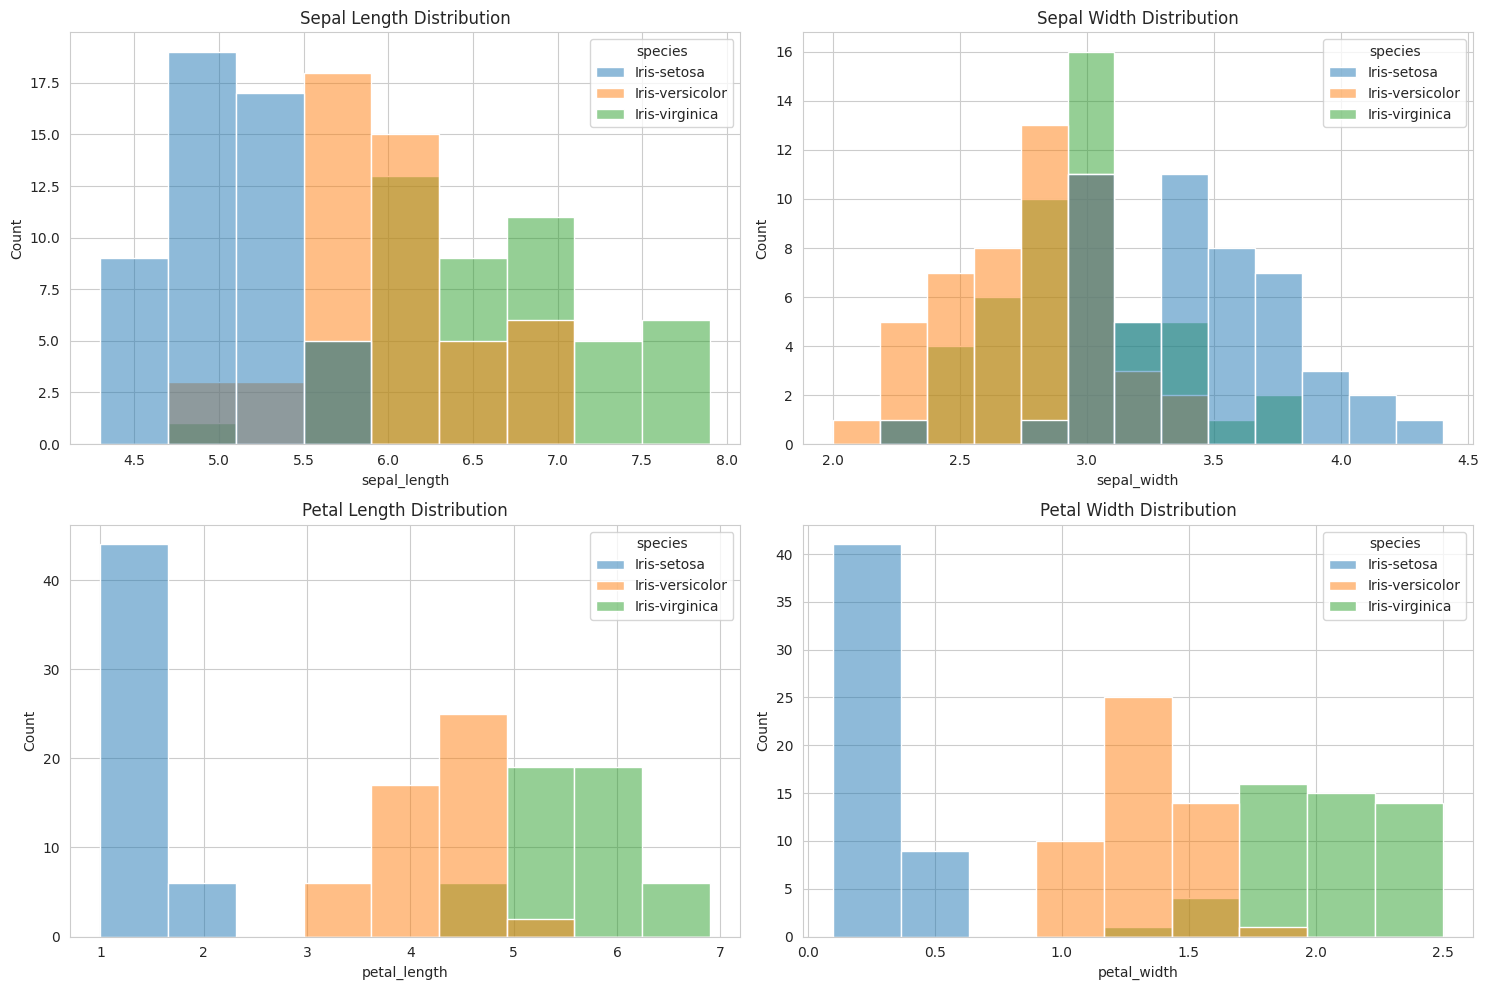

In [31]:
plt.figure(figsize=(15, 10))

# Histograms for sepal length, sepal width, petal length, and petal width
plt.subplot(2, 2, 1)
sns.histplot(data=df, x="sepal_length", hue="species")
plt.title("Sepal Length Distribution")

plt.subplot(2, 2, 2)
sns.histplot(data=df, x="sepal_width", hue="species")
plt.title("Sepal Width Distribution")

plt.subplot(2, 2, 3)
sns.histplot(data=df, x="petal_length", hue="species")
plt.title("Petal Length Distribution")

plt.subplot(2, 2, 4)
sns.histplot(data=df, x="petal_width", hue="species")
plt.title("Petal Width Distribution")

plt.tight_layout()


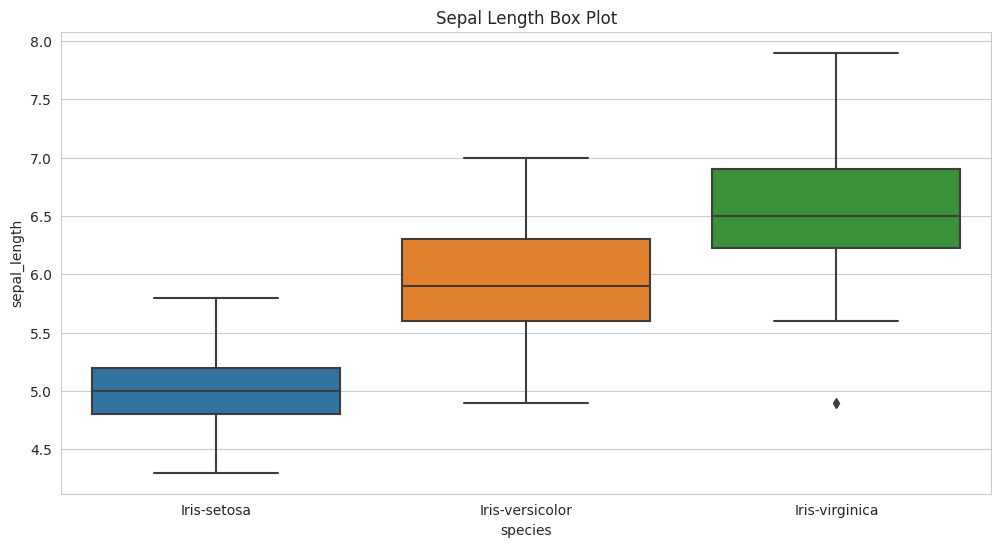

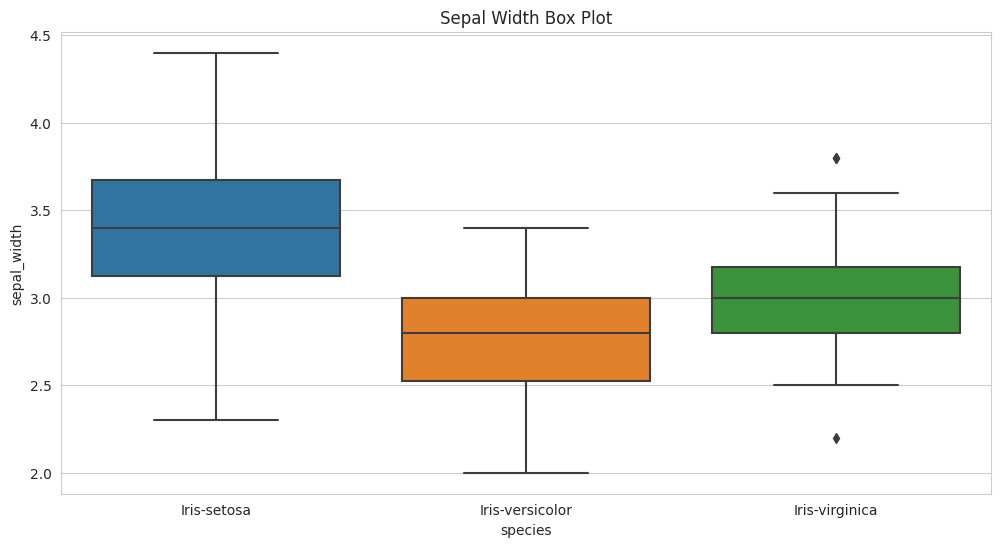

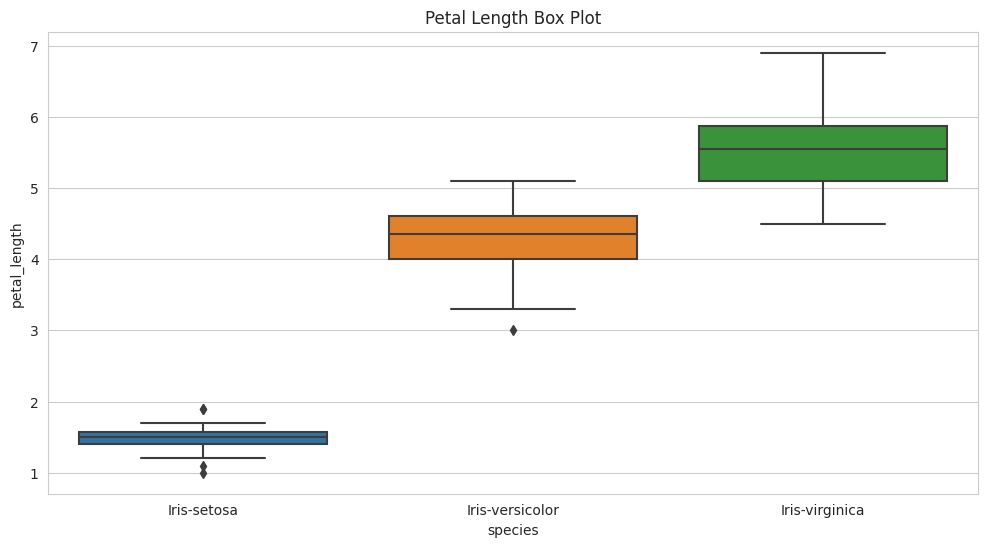

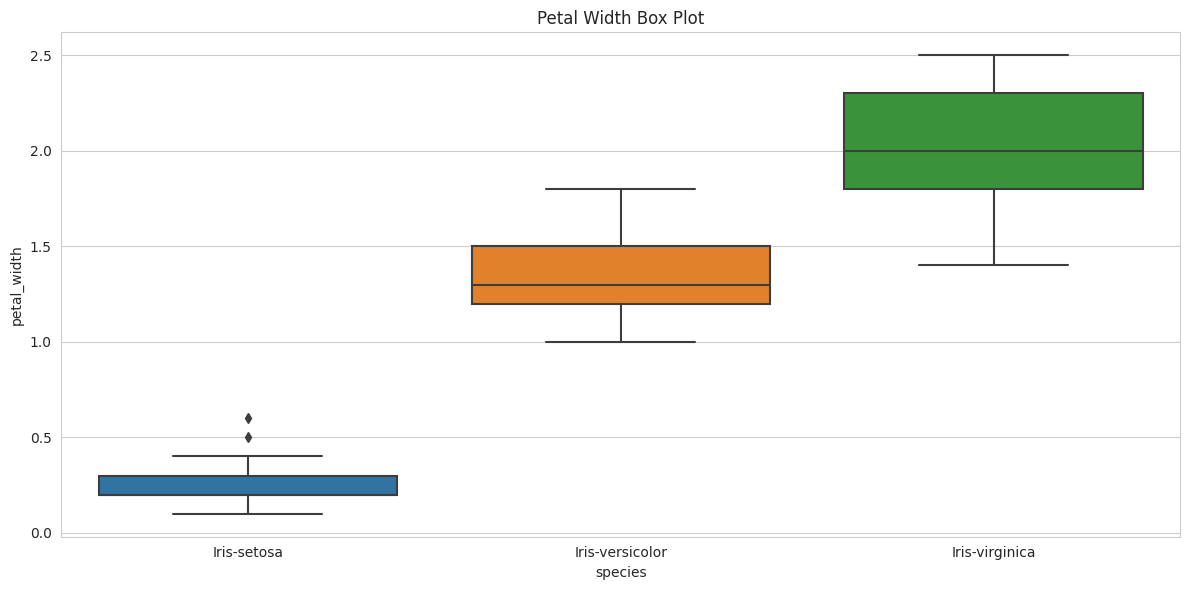

In [32]:
# Box plots for each feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="species", y="sepal_length")
plt.title("Sepal Length Box Plot")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="species", y="sepal_width")
plt.title("Sepal Width Box Plot")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="species", y="petal_length")
plt.title("Petal Length Box Plot")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="species", y="petal_width",)
plt.title("Petal Width Box Plot")

plt.tight_layout()

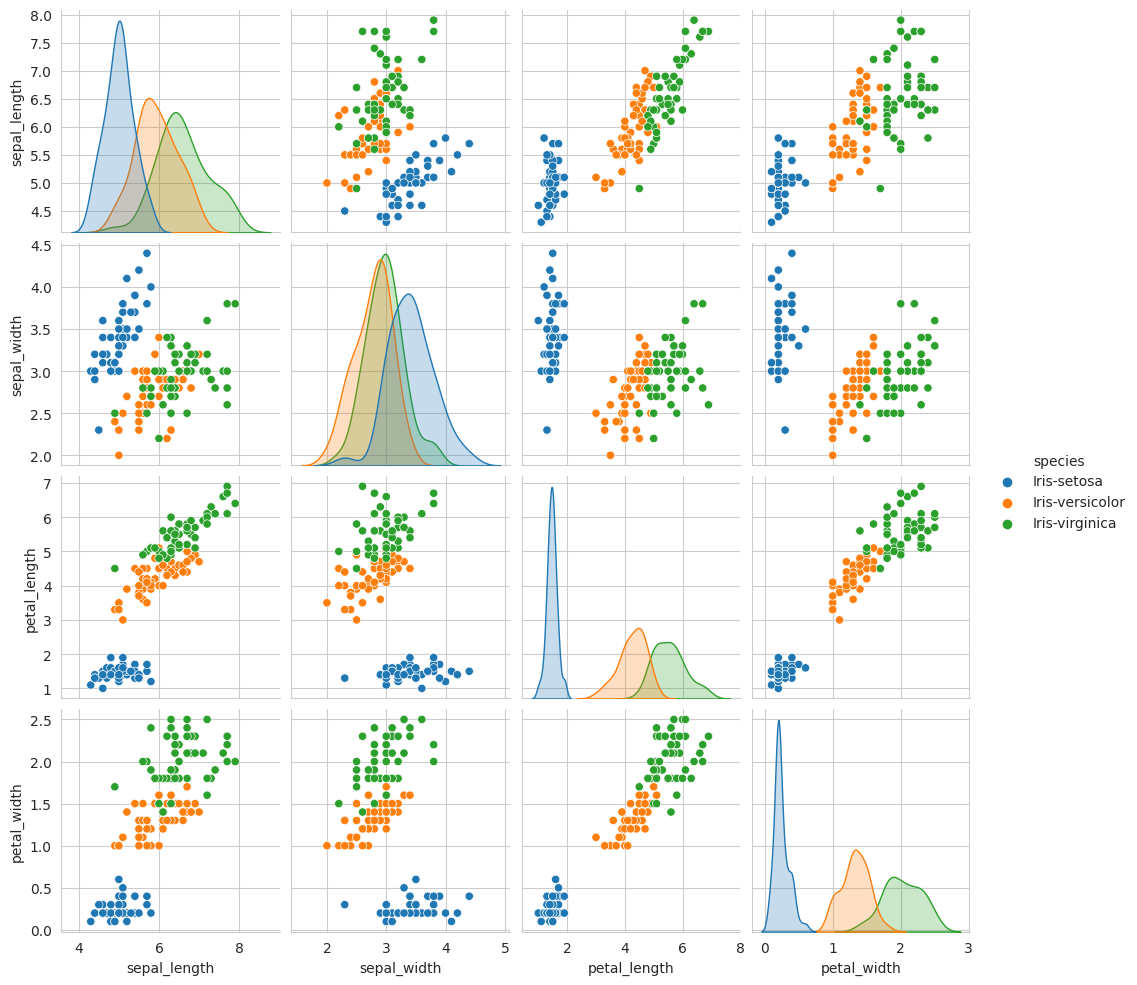

In [33]:
# Pair plots to visualize relationships between features
sns.set_style('whitegrid')
sns.pairplot(df, hue='species')
plt.show()

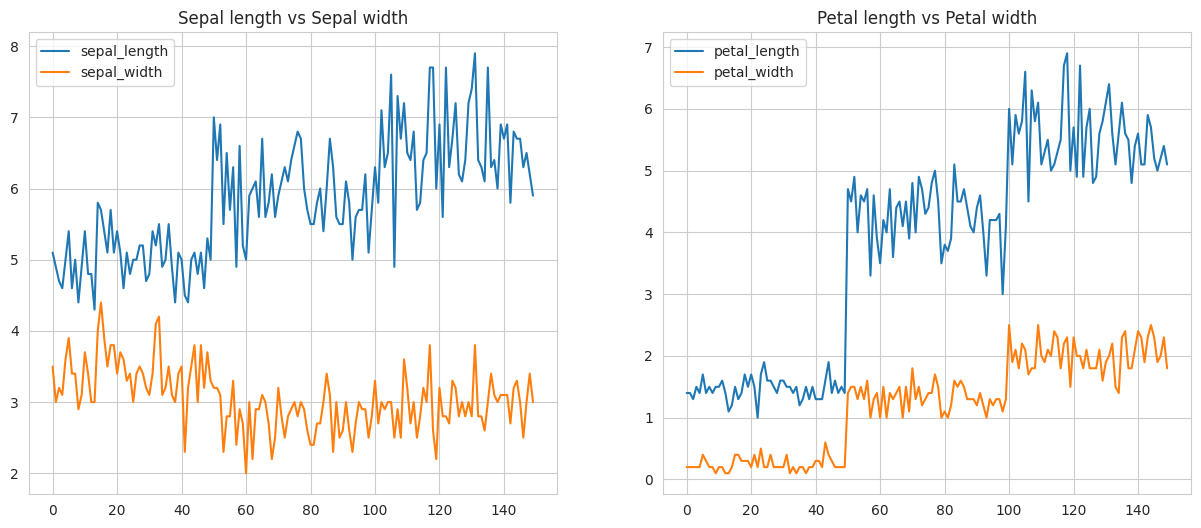

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].plot(df['sepal_length'], label='sepal_length')
ax[0].plot(df['sepal_width'], label='sepal_width')
ax[0].set_title('Sepal length vs Sepal width')
ax[0].legend()

ax[1].plot(df['petal_length'], label='petal_length')
ax[1].plot(df['petal_width'], label='petal_width')
ax[1].set_title('Petal length vs Petal width')
ax[1].legend()

plt.show()

In [35]:
X = df.drop('species', axis=1)
y = df['species']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,sepal_length,sepal_width,petal_length,petal_width
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [36]:
from sklearn.neighbors import KNeighborsClassifier


knn_clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [38]:
final=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

In [39]:
final

,Actual,Predicted
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
31,Iris-setosa,Iris-setosa
64,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
68,Iris-versicolor,Iris-versicolor
82,Iris-versicolor,Iris-versicolor


In [40]:
final.to_csv('IRIS_submission.csv')

In [41]:
print(f"Accuracy on test data is : {accuracy}")

Accuracy on test data is : 1.0
